In [1]:
import os
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

from keras.utils import to_categorical           # Library for One Hot Encoding
import keras.preprocessing.image as img


In [2]:
# !pwd

In [3]:
# Import Dataset
file_path = os.path.join("../Resources","fashion_mnist_test.csv")
df_testing=pd.read_csv(file_path)

In [4]:
df_testing.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Import Dataset
file_path = os.path.join("../Resources","fashion-mnist_train.csv")
df_training=pd.read_csv(file_path)

In [6]:
df_training.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
training_images = np.array(df_training.iloc[0:,1:])
training_images = training_images.reshape(len(training_images), 28,28) 
training_images = training_images.astype('float32')
training_labels = np.array(df_training.iloc[:,0])
training_labels = to_categorical(training_labels) 

In [8]:
testing_images = np.array(df_testing.iloc[0:,1:])
testing_images = testing_images.reshape(len(testing_images), 28,28)
testing_images = testing_images.astype('float32')
testing_labels = df_testing.iloc[:,0]

test_for_pred = testing_images  

In [9]:
test_labels_for_pred = testing_labels
testing_labels = to_categorical(testing_labels)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
training_images.shape

(60000, 28, 28)

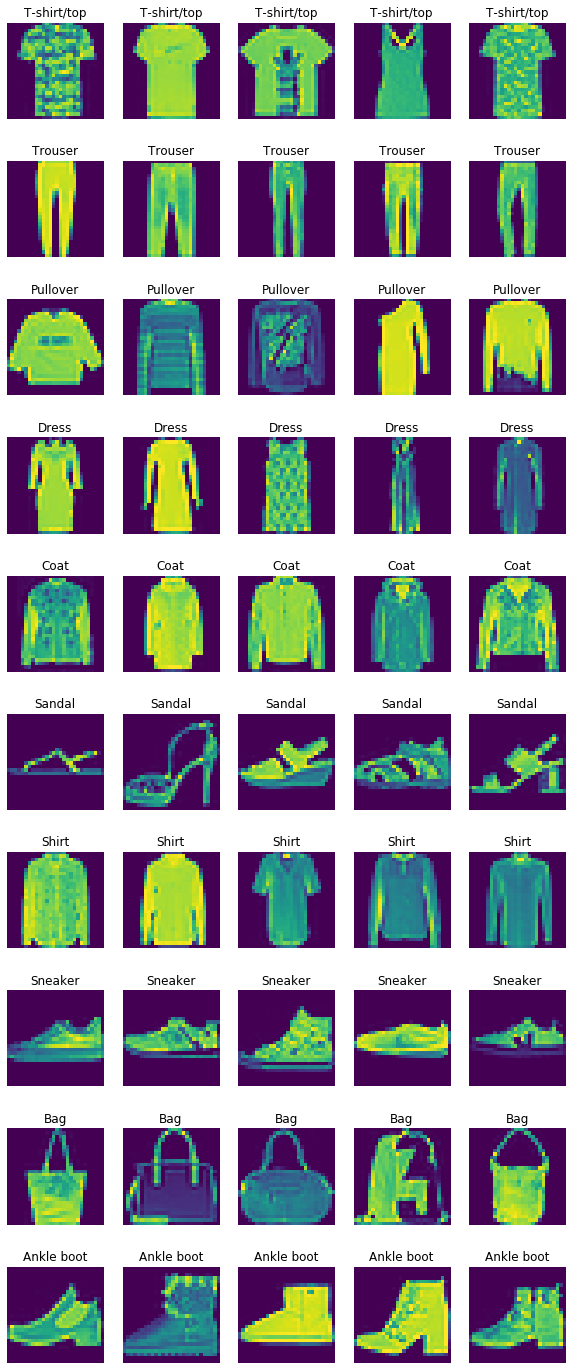

In [12]:
fig, ax = plt.subplots(10,5, figsize = (10,25))
for i,c_name in enumerate(class_names):
    temp = df_training[df_training.iloc[:,0] == i].head(5)
    for k in range(5):
        ax[i,k].imshow(np.array(temp.iloc[k,1:]).reshape(28,28))
        ax[i,k].axis('off')
        ax[i,k].grid(False)
        ax[i,k].title.set_text(str(c_name)) 

In [13]:
# plt.imshow(df_training[0], cmap=plt.cm.Greys)
# np.set_printoptions(linewidth = 200)
# fig, ax = plt.subplots(1,2, figsize = (20,8))
# ax[0].imshow(training_images[1], aspect = 'auto')
# ax[1].imshow(pixel_img,aspect = 'auto')



In [14]:
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [15]:
print(training_images.shape)
print(training_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


In [16]:
# Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(zoom_range=0.1,
                                      shear_range = 0.1,
                                      rotation_range = 0.1,
                                      horizontal_flip=True,
                                      fill_mode = 'nearest')

training_datagen.fit(training_images)

In [17]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu', padding= 'same', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.20),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu', padding= 'same'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10 , activation = 'softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
history = model.fit(training_datagen.flow(training_images, training_labels), verbose = 1, epochs = 30, batch_size = 50, steps_per_epoch= len(training_images)/ 50, validation_data= (testing_images, testing_labels))

Epoch 1/30
1200/1200 [==============================] - 48s 39ms/step - loss: 0.7724 - accuracy: 0.7128 - val_loss: 0.4001 - val_accuracy: 0.8526
Epoch 2/30
1200/1200 [==============================] - 36s 30ms/step - loss: 0.4124 - accuracy: 0.8488 - val_loss: 0.3057 - val_accuracy: 0.8879
Epoch 3/30
1200/1200 [==============================] - 32s 26ms/step - loss: 0.3623 - accuracy: 0.8665 - val_loss: 0.2675 - val_accuracy: 0.9034
Epoch 4/30
1200/1200 [==============================] - 41s 34ms/step - loss: 0.3304 - accuracy: 0.8782 - val_loss: 0.2563 - val_accuracy: 0.9058
Epoch 5/30
1200/1200 [==============================] - 42s 35ms/step - loss: 0.3153 - accuracy: 0.8826 - val_loss: 0.2478 - val_accuracy: 0.9101
Epoch 6/30
1200/1200 [==============================] - 42s 35ms/step - loss: 0.2948 - accuracy: 0.8914 - val_loss: 0.2307 - val_accuracy: 0.9149
Epoch 7/30
1200/1200 [==============================] - 41s 34ms/step - loss: 0.2885 - accuracy: 0.8938 - val_loss: 0.2396 -

In [19]:
# Model Evaluation

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

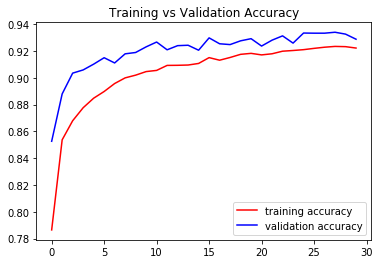

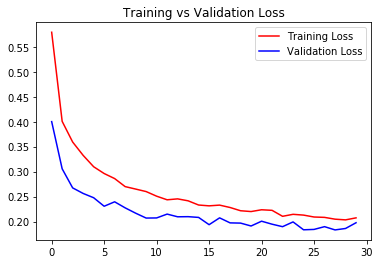

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(30)

plt.plot(epochs, acc, 'r', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs , val_loss, 'b', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [21]:
acc


[0.7864843606948853,
 0.8536718487739563,
 0.8678905963897705,
 0.8776041865348816,
 0.8847135305404663,
 0.8897135257720947,
 0.8956510424613953,
 0.8998697996139526,
 0.9019010663032532,
 0.9045572876930237,
 0.9054427146911621,
 0.909166693687439,
 0.9092447757720947,
 0.9094531536102295,
 0.9106249809265137,
 0.9149739742279053,
 0.9130468964576721,
 0.9150781035423279,
 0.9174218773841858,
 0.9181510210037231,
 0.917005181312561,
 0.9178385138511658,
 0.9197656512260437,
 0.9202864766120911,
 0.920911431312561,
 0.921875,
 0.9227343797683716,
 0.9233333468437195,
 0.9231510162353516,
 0.9221093654632568]

In [22]:
test_for_pred = np.expand_dims(test_for_pred, axis = 3)
test_predictions = model.predict_classes(test_for_pred)

from sklearn.metrics import classification_report
print(classification_report(test_labels_for_pred, test_predictions, target_names = class_names))

C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

 T-shirt/top       0.95      0.57      0.71      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.90      0.63      0.74      1000
       Dress       0.94      0.83      0.88      1000
        Coat       0.65      0.77      0.71      1000
      Sandal       0.99      0.91      0.95      1000
       Shirt       0.47      0.78      0.59      1000
     Sneaker       0.93      0.93      0.93      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.93      0.97      0.95      1000

    accuracy                           0.83     10000
   macro avg       0.87      0.83      0.84     10000
weighted avg       0.87      0.83      0.84     10000



In [40]:
pic_names = os.listdir('images/DavidImages')   
print(pic_names[0:2])

['bag1.jpg', 'bag2.jpg']


IndexError: index 6 is out of bounds for axis 1 with size 6

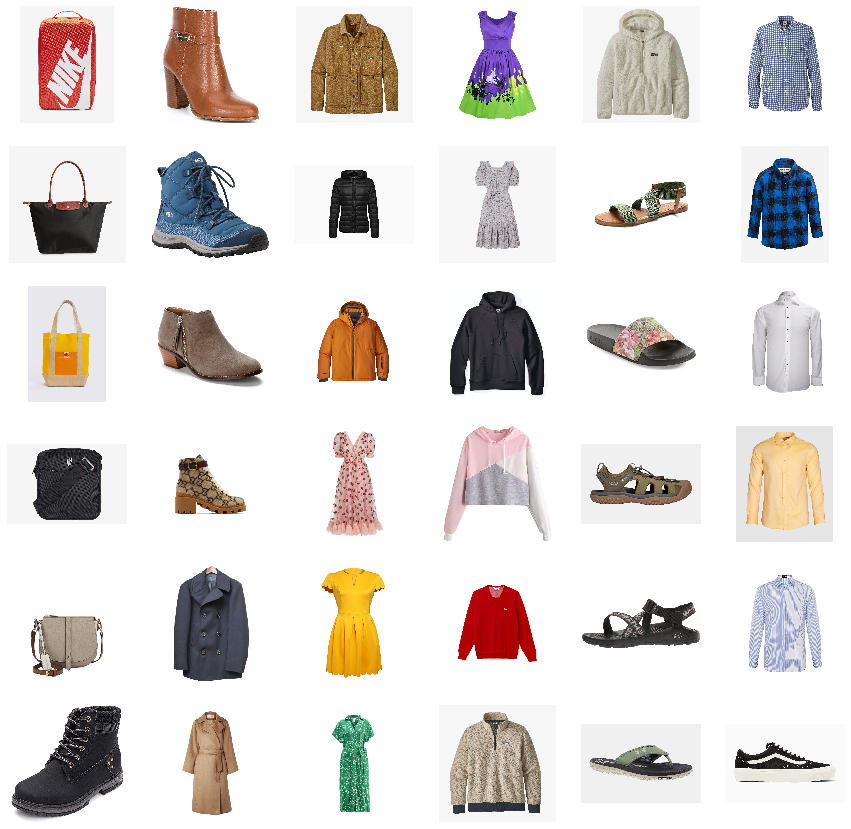

In [27]:
# Loading the Real Pictures
real_images = []
fig, ax = plt.subplots(6,6, figsize = (15,15))
i = 0
k = 0
for f in pic_names:
    path = 'images/DavidImages/'
    image = img.load_img(path + f)     
    if i>5:
        k+=1
        i=0
    ax[i,k].imshow(image)
    ax[i,k].grid(False)
    ax[i,k].axis('off')
    i+=1

In [28]:
# Real pictures Prediction

import keras.preprocessing.image as img
images = []
for f in pic_names:
    path = 'images/DavidImages/'
    image = img.load_img(path + f, grayscale=True, target_size=(28,28))      # Convert into grayscle and 28x28
    x = img.img_to_array(image)
    images.append(x.reshape(28,28))

C:\Users\tobia\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


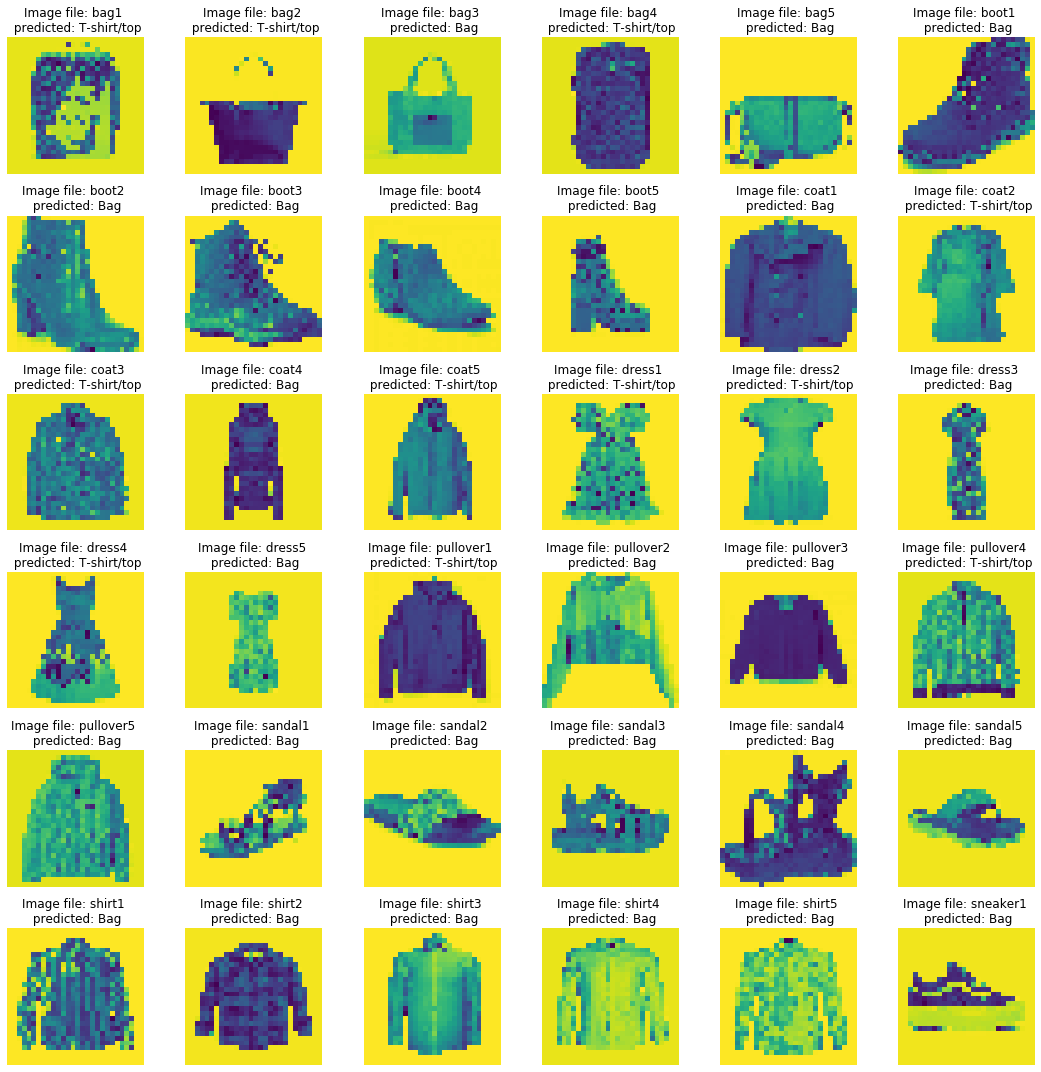

In [29]:
obj_images = np.expand_dims(images, axis = 3)
obj_images = obj_images.astype('float32')
obj_images = obj_images / 255.0
predicted_images = model.predict(obj_images)

fig, ax = plt.subplots(6,6, figsize = (15,15))
pic = 0

for i in range(6):
  for k in range(6):
    ax[i,k].imshow(images[pic])
    #ax[i,k].add_subplot(gs[i,k])
    ax[i,k].axis('off')
    ax[i,k].grid(False)
    file_name = pic_names[pic].split('.')[0]
    ax[i,k].title.set_text(f'Image file: {file_name} \n predicted: {class_names[np.argmax(predicted_images[pic])]}')
    pic +=1 
plt.tight_layout()
plt.show()

In [30]:
true_pred = 0
for i,img in enumerate(predicted_images):
    pred = class_names[np.argmax(img)]
    pred = list(pred)[0].lower() + list(pred)[1].lower()
    out = list(pic_names[i])[0].lower() + list(pic_names[i])[1].lower()
    if pred == out:
        true_pred += 1
print(f'{round((true_pred/len(predicted_images))*100,2)} of the real pictures are predicted correctly.')

12.0 of the real pictures are predicted correctly.


In [31]:
#The real pictures' background is converted to 0.
for pic in range(len(images)):
  for i in range(28):
    for k in range(28):
      if images[pic][i][k] >= 235:
        images[pic][i][k] = 0
      else:
        images[pic][i][k] =images[pic][i][k]

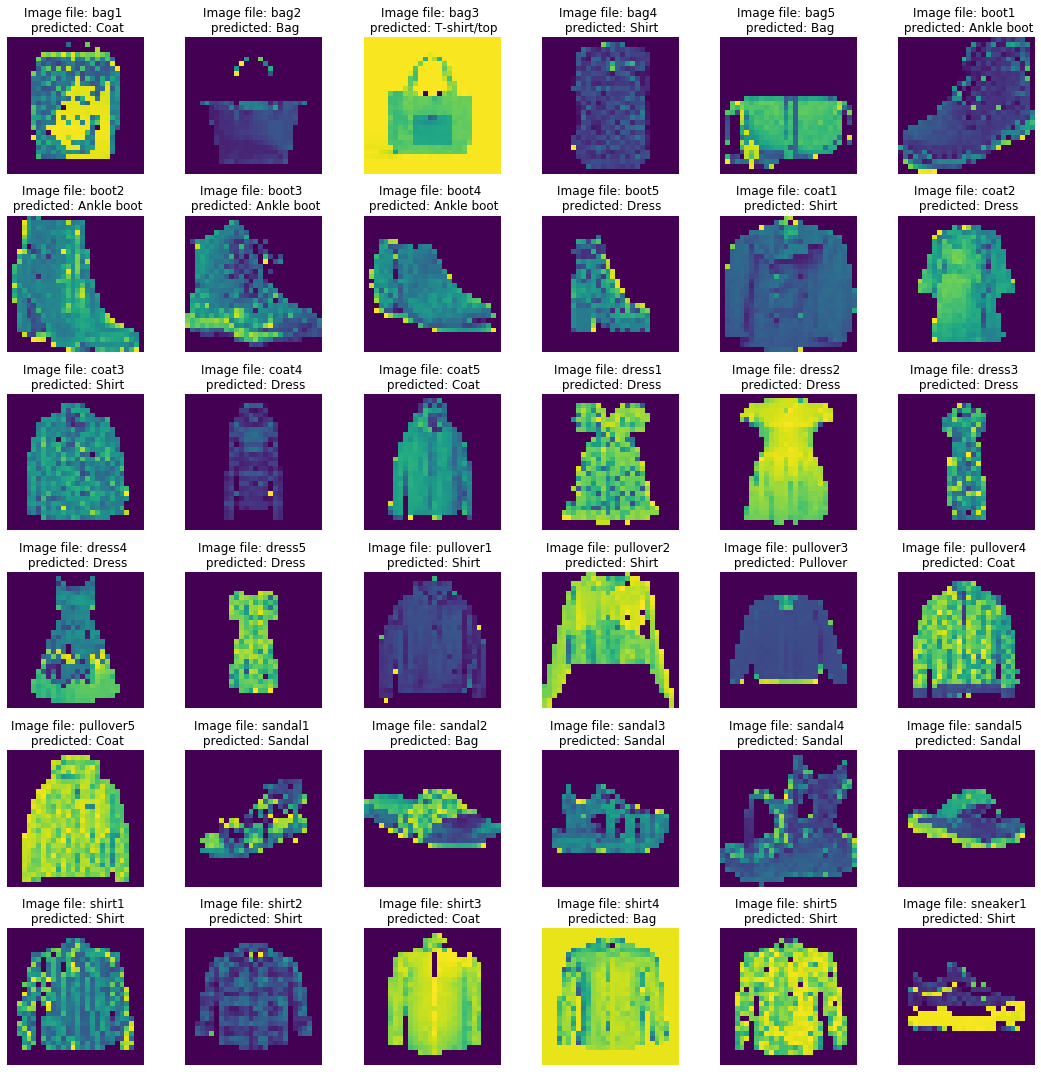

In [32]:
import matplotlib.gridspec as gridspec
obj_images = np.expand_dims(images, axis = 3)
obj_images = obj_images.astype('float32')
obj_images = obj_images / 255.0
predicted_images1 = model.predict(obj_images)

fig, ax = plt.subplots(6,6, figsize = (15,15))
pic = 0
for i in range(6):
  for k in range(6):
    ax[i,k].imshow(images[pic])
    ax[i,k].axis('off')
    ax[i,k].grid(False)
    file_name = pic_names[pic].split('.')[0]
    ax[i,k].title.set_text(f'Image file: {file_name} \n predicted: {class_names[np.argmax(predicted_images1[pic])]}')
    pic +=1 
plt.tight_layout()
plt.show()

In [33]:
# Correct prediction rate
true_pred = 0
for i,img in enumerate(predicted_images1):
    pred = class_names[np.argmax(img)]
    pred = list(pred)[0].lower() + list(pred)[1].lower()
    out = list(pic_names[i])[0].lower() + list(pic_names[i])[1].lower()
    if pred == out:
        true_pred += 1
print(f'{round((true_pred/len(predicted_images1))*100,2)} of the real pictures are predicted correctly.')
    

42.0 of the real pictures are predicted correctly.


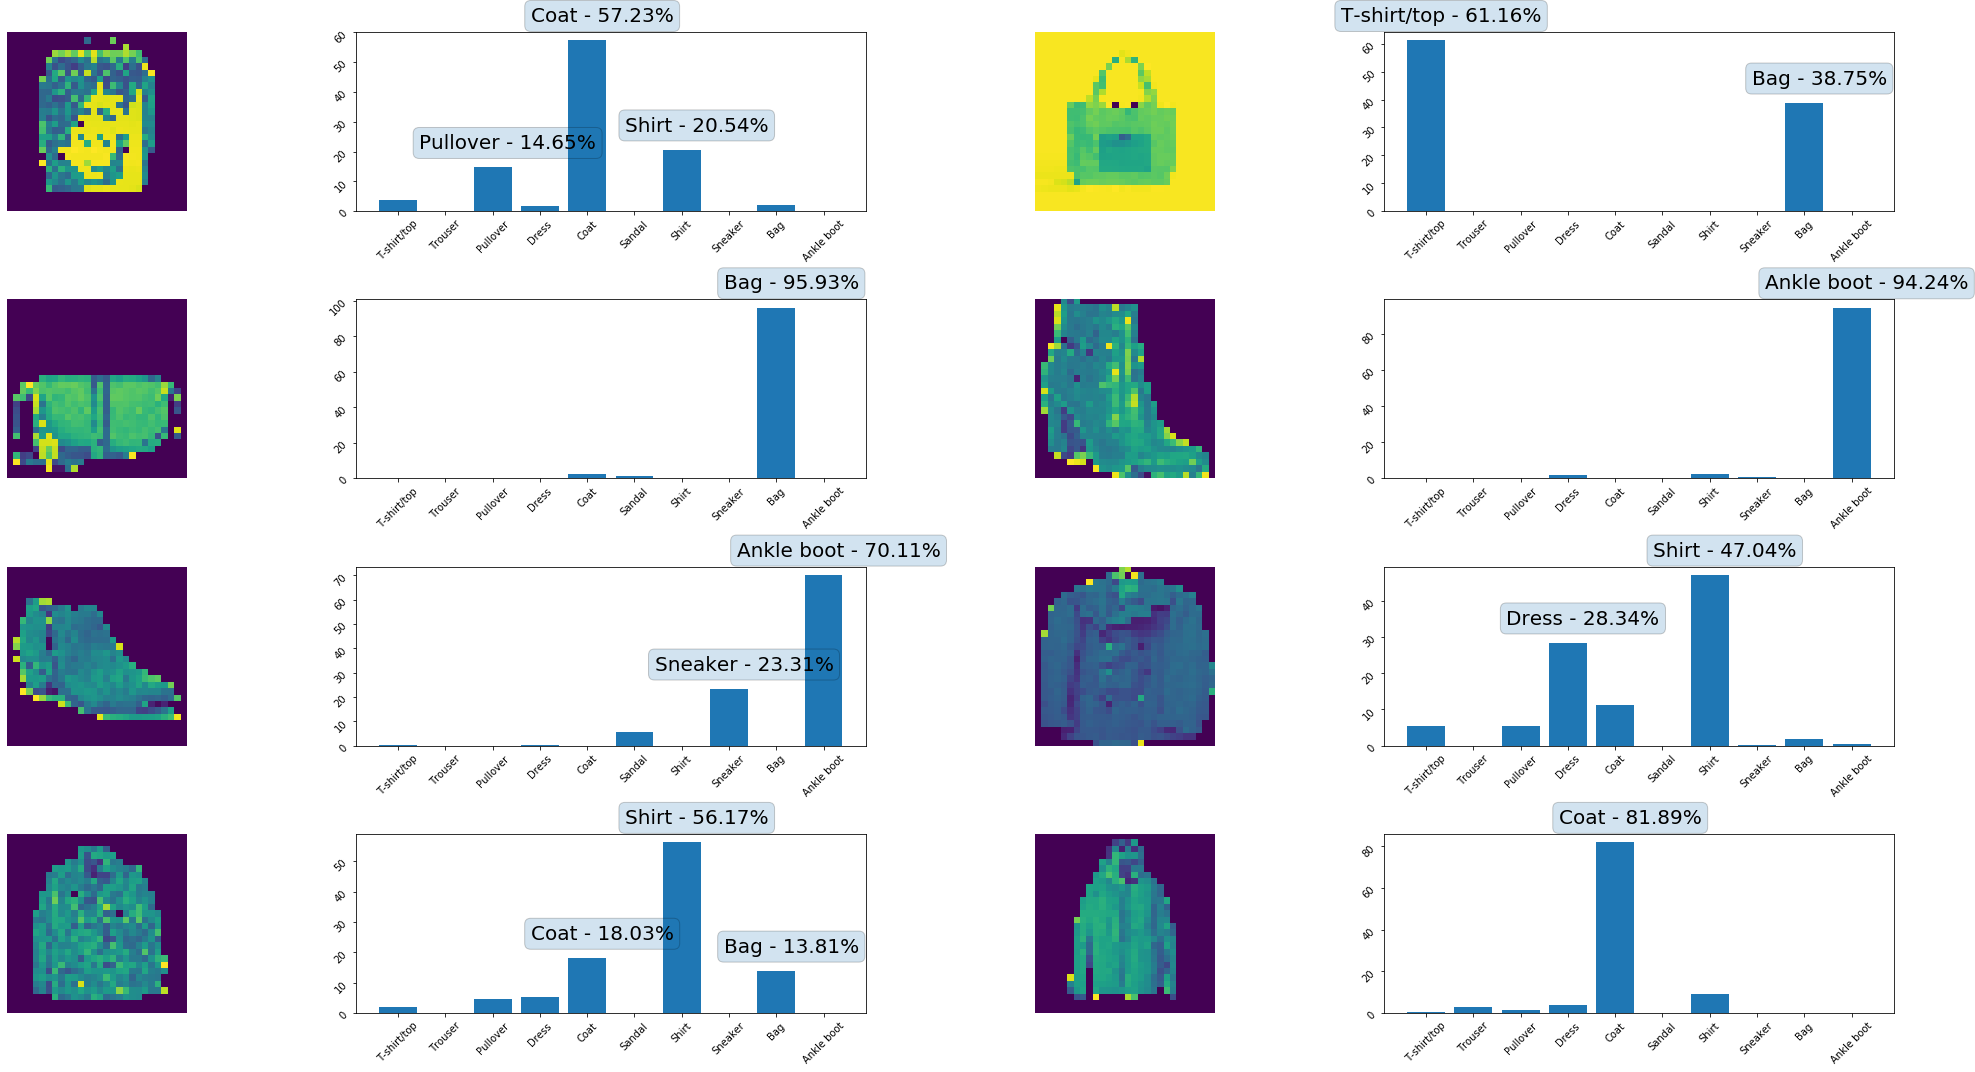

In [34]:
pic = 0
fig, ax = plt.subplots(4,4, figsize =(30,15))
for i in range(4):
  for k in range(4):
    if k % 2 == 0:
      ax[i,k].imshow(images[pic])
      ax[i,k].axis('off')
      ax[i,k].grid(False)
    elif k % 2 == 1:
      ax[i,k].bar(class_names, predicted_images1[pic-1]* 100 )
      ax[i,k].tick_params(rotation =45)
      for a,p in enumerate(ax[i,k].patches):
        if p.get_height() > 12:
            
            ax[i,k].annotate(f"{class_names[a]} - "+format( p.get_height(),'.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), bbox=dict(boxstyle="round", alpha=0.2),size = 20, ha = 'center', va = 'bottom', xytext = (15,15), textcoords = 'offset points')
    pic +=1
    
plt.tight_layout()

In [35]:
model2 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu', padding= 'same', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.20),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu', padding= 'same'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(10 , activation = 'softmax')])

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model2.fit(training_images, training_labels, verbose = 1, epochs = 30, batch_size = 50, steps_per_epoch= len(training_images)/ 50, validation_data= (testing_images, testing_labels))


Epoch 1/30
1200/1200 [==============================] - 66s 54ms/step - loss: 0.6703 - accuracy: 0.7555 - val_loss: 0.3129 - val_accuracy: 0.8909
Epoch 2/30
1200/1200 [==============================] - 49s 41ms/step - loss: 0.3410 - accuracy: 0.8753 - val_loss: 0.2623 - val_accuracy: 0.9034
Epoch 3/30
1200/1200 [==============================] - 44s 37ms/step - loss: 0.2902 - accuracy: 0.8947 - val_loss: 0.2450 - val_accuracy: 0.9132
Epoch 4/30
1200/1200 [==============================] - 45s 38ms/step - loss: 0.2708 - accuracy: 0.9005 - val_loss: 0.2261 - val_accuracy: 0.9166
Epoch 5/30
1200/1200 [==============================] - 46s 39ms/step - loss: 0.2419 - accuracy: 0.9120 - val_loss: 0.2176 - val_accuracy: 0.9199
Epoch 6/30
1200/1200 [==============================] - 48s 40ms/step - loss: 0.2287 - accuracy: 0.9153 - val_loss: 0.1997 - val_accuracy: 0.9264
Epoch 7/30
1200/1200 [==============================] - 51s 42ms/step - loss: 0.2109 - accuracy: 0.9211 - val_loss: 0.2156 -

In [36]:
# Model Comparasion
test_predictions = model.predict_classes(test_for_pred)
from sklearn.metrics import classification_report
print('Model 1 with augmentation\n')
print(classification_report(test_labels_for_pred, test_predictions, target_names = class_names))

test_predictions2 = model2.predict_classes(test_for_pred)
from sklearn.metrics import classification_report
print('Model 2 without augmentation\n')
print(classification_report(test_labels_for_pred, test_predictions2, target_names = class_names))

C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model 1 with augmentation

              precision    recall  f1-score   support

 T-shirt/top       0.95      0.57      0.71      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.90      0.63      0.74      1000
       Dress       0.94      0.83      0.88      1000
        Coat       0.65      0.77      0.71      1000
      Sandal       0.99      0.91      0.95      1000
       Shirt       0.47      0.78      0.59      1000
     Sneaker       0.93      0.93      0.93      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.93      0.97      0.95      1000

    accuracy                           0.83     10000
   macro avg       0.87      0.83      0.84     10000
weighted avg       0.87      0.83      0.84     10000

Model 2 without augmentation

              precision    recall  f1-score   support

 T-shirt/top       0.92      0.74      0.82      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.

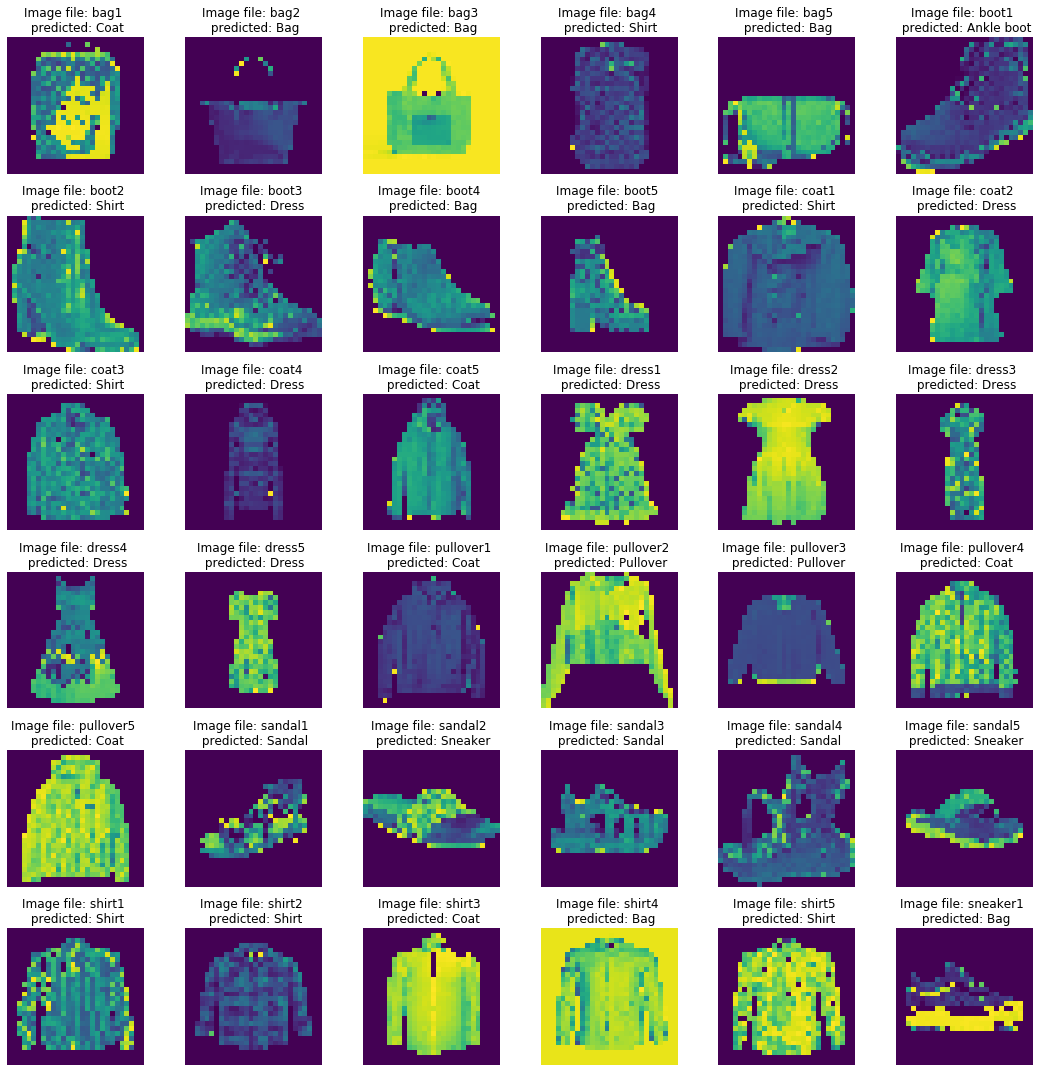

In [37]:
import matplotlib.gridspec as gridspec
obj_images = np.expand_dims(images, axis = 3)
obj_images = obj_images.astype('float32')
obj_images = obj_images / 255.0
predicted_images2 = model2.predict(obj_images)

fig, ax = plt.subplots(6,6, figsize = (15,15))
pic = 0

for i in range(6):
  for k in range(6):
    ax[i,k].imshow(images[pic])
    #ax[i,k].add_subplot(gs[i,k])
    ax[i,k].axis('off')
    ax[i,k].grid(False)
    file_name = pic_names[pic].split('.')[0]
    ax[i,k].title.set_text(f'Image file: {file_name} \n predicted: {class_names[np.argmax(predicted_images2[pic])]}')
    pic +=1 
plt.tight_layout()
plt.show()

In [38]:
true_pred = 0
for i,img in enumerate(predicted_images2):
    pred = class_names[np.argmax(img)]
    pred = list(pred)[0].lower() + list(pred)[1].lower()
    out = list(pic_names[i])[0].lower() + list(pic_names[i])[1].lower()
    if pred == out:
        true_pred += 1
print(f'{round((true_pred/len(predicted_images2))*100,2)} of the real pictures are predicted correctly.')
    

46.0 of the real pictures are predicted correctly.


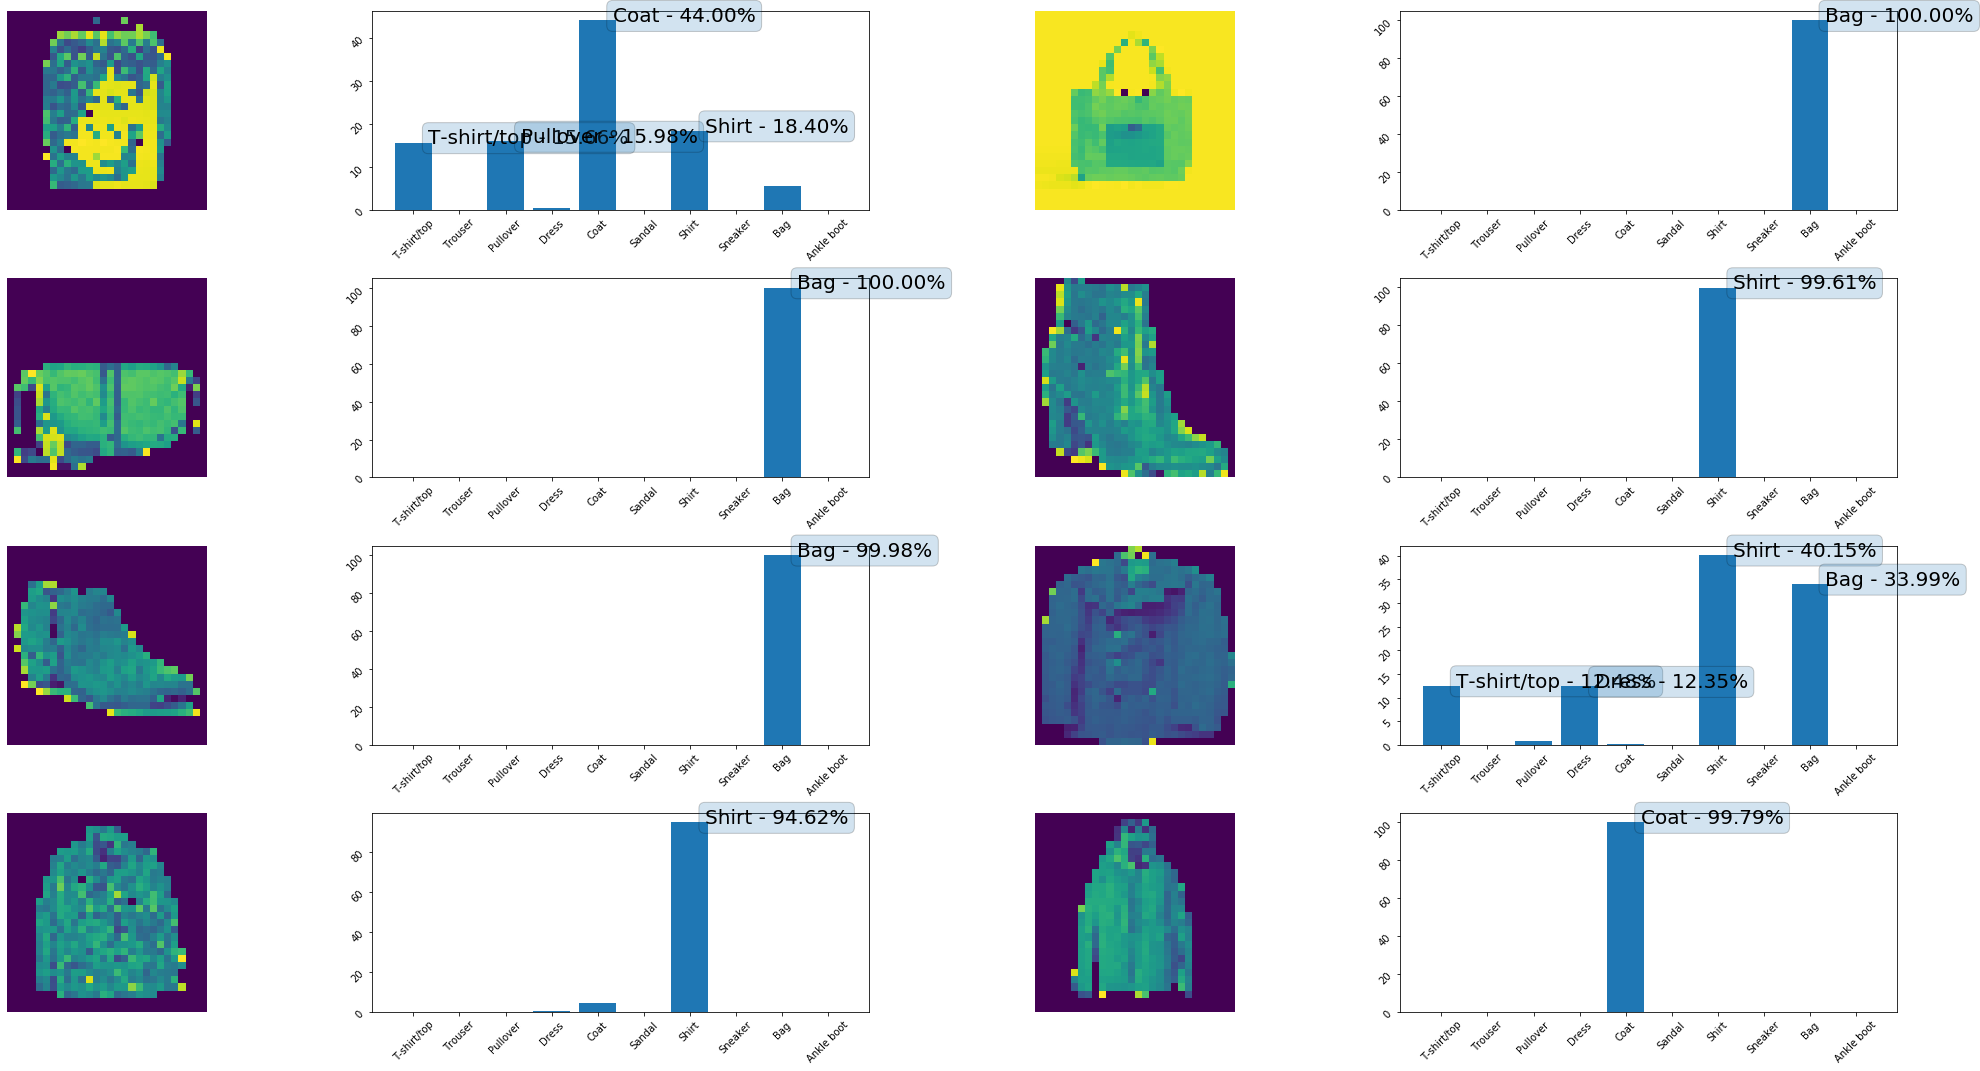

In [39]:
pic = 0
fig, ax = plt.subplots(4,4, figsize =(30,15))
for i in range(4):
  for k in range(4):
    if k % 2 == 0:
      ax[i,k].imshow(images[pic])
      ax[i,k].axis('off')
      ax[i,k].grid(False)
    elif k % 2 == 1:
      ax[i,k].bar(class_names, predicted_images2[pic-1]* 100 )
      ax[i,k].tick_params(rotation =45)
      for a,p in enumerate(ax[i,k].patches):

        if p.get_height() > 12:
            
            ax[i,k].annotate(f"{class_names[a]} - "+format( p.get_height(),'.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), bbox=dict(boxstyle="round", alpha=0.2),size = 20, ha = 'left', va = 'bottom', xytext = (15,-5), textcoords = 'offset points')
    pic +=1
    
plt.tight_layout()